## _Table of Contents 📋_
1. [Importing Libraries](#CH-1)
2. [Data Importing](#CH-2)
    * Data Quality
        * Handling Duplicate Rows and Columns
        * Missing Values
        * Uniqueness
    * Basic Modeification on DataFrame
    * Data Describing
    * Dataset Description
    * Feature Definition
3. [Exploratory Data Analysis](#CH-3)
4. [Feature Engineering](#CH-4)
    * Train-Test Split
    * Handling Missing Values
    * Outiler Treatment
    * Feature Encoding
5. [Decision Tree](#CH-5)
    * Building Model + Cross Validation + Hyper-Parameter Tuning
    * Model Evaluation
6. [Random Forest](#CH-6)
    * Building Model + Cross Validation + Hyper-Parameter Tuning
    * Model Evaluation
7. [Ada Boost](#CH-7)
    * Building Model + Cross Validation + Hyper-Parameter Tuning
    * Model Evaluation
8. [Gradient Boost](#CH-8)
    * Building Model + Cross Validation + Hyper-Parameter Tuning
    * Model Evaluation
9. [XG Boost](#CH-9)
    * Building Model + Cross Validation + Hyper-Parameter Tuning
    * Model Evaluation
10. [Result and Discussion](#CH-10)

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-1"></a> 
<p style="padding: 10px;
              color:white;">
              1. Importing Libraries 📚
</p>
</div>

In [12]:
# Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-2"></a> 
<p style="padding: 10px;
              color:white;">
              2. Data Import and Auditing 👨‍💻
</p>
</div>

<h2 align="left"><font color='#0E9D00'><u>Data Import</u></font></h2>

In [13]:
df = pd.read_csv('Weather_forecast.csv')
df.head()

df.shape

(8425, 23)

<h2 align="left"><font color='#0E9D00'><u>Data View</u></font></h2>

In [14]:
# Data Viewing Initial 11 columns
df.iloc[:5,:11]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  
0           W           44.0          W        WNW  
1         WNW           44.0        NNW        WSW  
2         WSW           46.0          W        WSW  
3          NE           24.0         SE          E  
4           W           41.0        ENE         NW

In [15]:
# Data Viewing Rest of the columns
df.iloc[:5,11:]

WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.1       8.0       NaN     16.9     21.8        No           No  
1       1007.8       NaN       NaN     17.2     24.3        No           No  
2       1008.7       NaN       2.0     21.0     23.2        No           No  
3       1012.8       NaN       NaN     18.1     26.5        No           No  
4       1006.0       7.0       8.0     17.8     29.7        No           No

In [16]:
# Understanding Data - Total Entries, Number of Columns, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

<h2 align="left"><font color='#0E9D00'><u>Data Quality</u></font></h2>

In [17]:
# Duplicate Rows
df.duplicated().sum()

1663

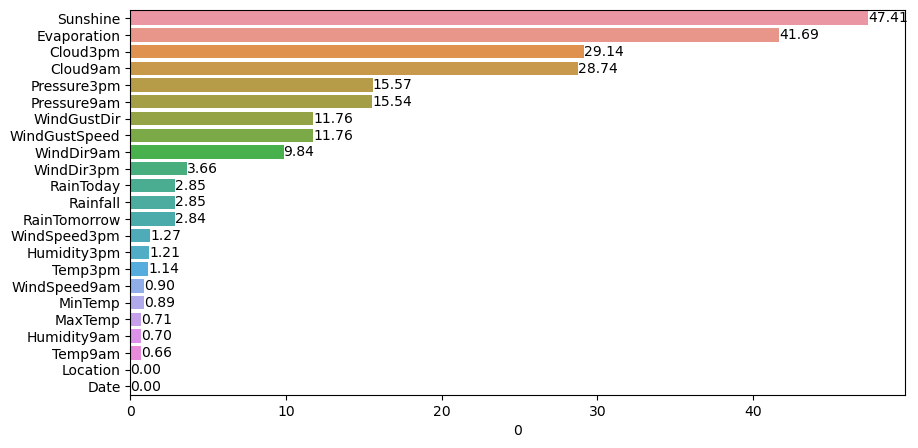

In [18]:
Missing_values = pd.DataFrame((df.isnull().sum()/len(df)*100).sort_values(ascending=False))

ax=plt.figure(figsize=(10,5))
ax = sns.barplot(data=Missing_values,y=Missing_values.index,x=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')
plt.show()

In [19]:
# Features Having Missing Value above - 10 % will be Dropped
df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1,inplace=True)

# Dropping Unwanted Columns
df.drop(['Date'],axis=1,inplace=True)

# Dropping Null Values From Target Variable - 2.25%
df.dropna(subset=['RainTomorrow'], axis=0, inplace=True)

In [20]:
# Unique Values in Each Feature
distinct_counts = []


for column in df.columns:
    distinct_count = df[column].nunique()  
    first_5_unique_values = df[column].unique()[:5]  
    last_5_unique_values = df[column].unique()[-5:] 
    distinct_counts.append({
        'Column': column, 
        'Distinct_Values_Count': distinct_count, 
        'First_5_Unique_Values': first_5_unique_values,
        'Last_5_Unique_Values': last_5_unique_values
    })

distinct_counts_df = pd.DataFrame(distinct_counts)


distinct_counts_df.sort_values(by='Distinct_Values_Count', ascending=False,ignore_index=True)

Column  Distinct_Values_Count  \
0     Pressure9am                    383   
1     Pressure3pm                    373   
2         MaxTemp                    331   
3         Temp3pm                    327   
4         Temp9am                    304   
5         MinTemp                    285   
6        Rainfall                    250   
7     Humidity3pm                     94   
8     Humidity9am                     90   
9   WindGustSpeed                     51   
10   WindSpeed3pm                     35   
11   WindSpeed9am                     33   
12    WindGustDir                     16   
13     WindDir9am                     16   
14     WindDir3pm                     16   
15       Location                     12   
16      RainToday                      2   
17   RainTomorrow                      2   

                                First_5_Unique_Values  \
0            [1007.7, 1010.6, 1007.6, 1017.6, 1010.8]   
1            [1007.1, 1007.8, 1008.7, 1012.8, 1006.0]   
2                      [22.9, 25.1, 25.7, 28.0, 32.3]   
3                      [21.8, 24.3, 23.2, 26.5, 29.7]   
4                      [16.9, 17.2, 21.0, 18.1, 17.8]   
5                        [13.4, 7.4, 12.9, 9.2, 17.5]   
6                           [0.6, 0.0, 1.0, 0.2, 1.4]   
7                      [22.0, 25.0, 30.0, 16.0, 33.0]   
8                      [71.0, 44.0, 38.0, 45.0, 82.0]   
9                      [44.0, 46.0, 24.0, 41.0, 56.0]   
10                      [24.0, 22.0, 26.0, 9.0, 20.0]   
11                       [20.0, 4.0, 19.0, 11.0, 7.0]   
12                             [W, WNW, WSW, NE, NNW]   
13                              [W, NNW, SE, ENE, SW]   
14                               [WNW, WSW, E, NW, W]   
15  [Albury, CoffsHarbour, Newcastle, Penrith, Wil...   
16                                     [No, Yes, nan]   
17                                          [No, Yes]   

                                 Last_5_Unique_Values  
0              [998.5, 1033.2, 1000.2, 996.7, 1033.6]  
1              [998.1, 1031.3, 1029.3, 996.2, 1029.5]  
2                      [38.0, 40.4, 39.5, 39.4, 43.5]  
3                      [37.0, 41.3, 37.8, 40.5, 42.4]  
4                      [32.8, 31.2, 39.4, 30.5, 30.2]  
5                      [27.0, 25.8, 25.9, 25.2, 26.0]  
6                     [26.8, 91.0, 142.2, 96.8, 40.0]  
7                        [96.0, 88.0, nan, 98.0, 6.0]  
8                      [12.0, 11.0, 24.0, 26.0, 15.0]  
9                      [7.0, 93.0, 91.0, 89.0, 102.0]  
10                     [83.0, 54.0, 61.0, 57.0, 52.0]  
11                     [52.0, 44.0, 61.0, 57.0, 48.0]  
12                             [SE, ESE, nan, E, SSW]  
13                             [ESE, E, NW, WNW, NNE]  
14                               [N, S, NNE, nan, NE]  
15  [Brisbane, Adelaide, PerthAirport, Darwin, Uluru]  
16                                     [No, Yes, nan]  
17                                          [No, Yes]

<h2 align="left"><font color='#0E9D00'><u>Data Description</u></font></h2>

In [21]:
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  8126.000000  8151.000000  8079.000000    7233.000000   8124.000000   
mean     13.148794    23.842338     2.802451      40.040094     13.787051   
std       5.420325     6.119105    10.485324      14.634052     10.160570   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.100000    19.300000     0.000000      30.000000      6.000000   
50%      13.200000    23.200000     0.000000      39.000000     13.000000   
75%      17.300000    28.000000     1.000000      48.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     61.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   8100.000000  8142.000000  8103.000000  6894.000000  6893.000000   
mean      18.475309    67.741955    51.177465  1017.712460  1015.304845   
std        9.784151    16.847098    18.426423     6.833132     6.763003   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    39.000000  1013.100000  1010.500000   
50%       19.000000    68.000000    51.000000  1017.700000  1015.400000   
75%       24.000000    80.000000    63.000000  1022.300000  1019.900000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

           Temp9am      Temp3pm  
count  8145.000000  8109.000000  
mean     17.744948    22.431138  
std       5.627218     5.962556  
min       1.900000     7.300000  
25%      13.700000    18.100000  
50%      17.700000    21.900000  
75%      21.900000    26.400000  
max      39.400000    44.100000

<h2 align="left"><font color='#0E9D00'><u>Data Definition</u></font></h2>

In [22]:
# Data Defining for Visualization and Processing
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns.remove('RainTomorrow')
numeric_columns,categorical_columns

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li>In total Dataset Comprises 23 features.</li>
        <li>Target Variable - Rain Tomorrow is Binary Category.</li>
        <li>Features such as 'Sunshine','Evaporation','Cloud3pm','Cloud9am' have missing values about 40% and hence they were dropped.</li>
        <li>Statistical Value suggest Outlier's Present in Dataset </li>
        <li>Rainfall" feature, 75% - 0.8 and max - 371.0 suggesting a unsual values, meaning it might have some extreme values.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-3"></a> 
<p style="padding: 10px;
              color:white;">
              3. Exploratory Data Analysis (Modelling Perspective⚙️) 🕵🏻‍♂️
</p>
</div>

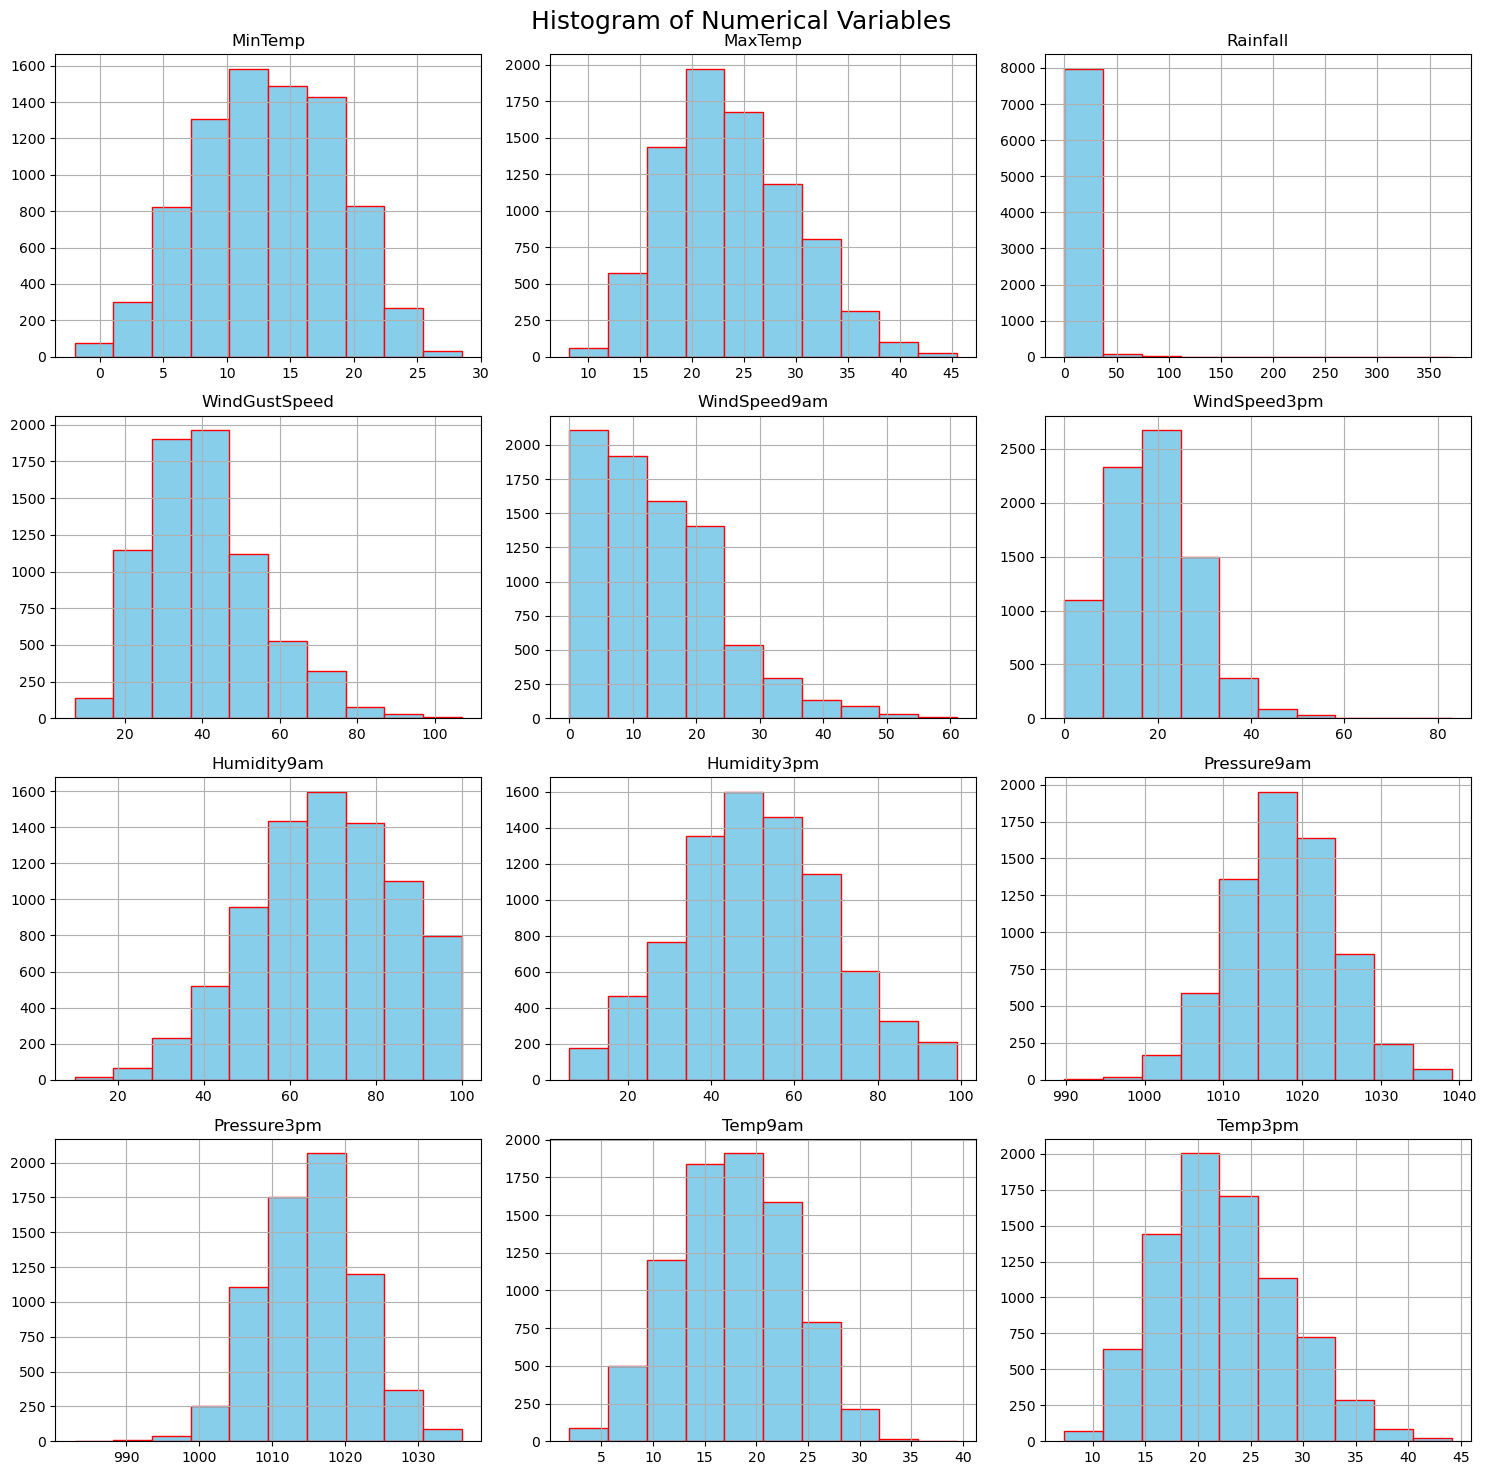

In [23]:
# Combined Histogram of All Features
df[numeric_columns].hist(figsize=(15, 15), edgecolor='r', color='skyblue')
plt.suptitle('Histogram of Numerical Variables ', fontsize=18)
plt.tight_layout()
plt.show()

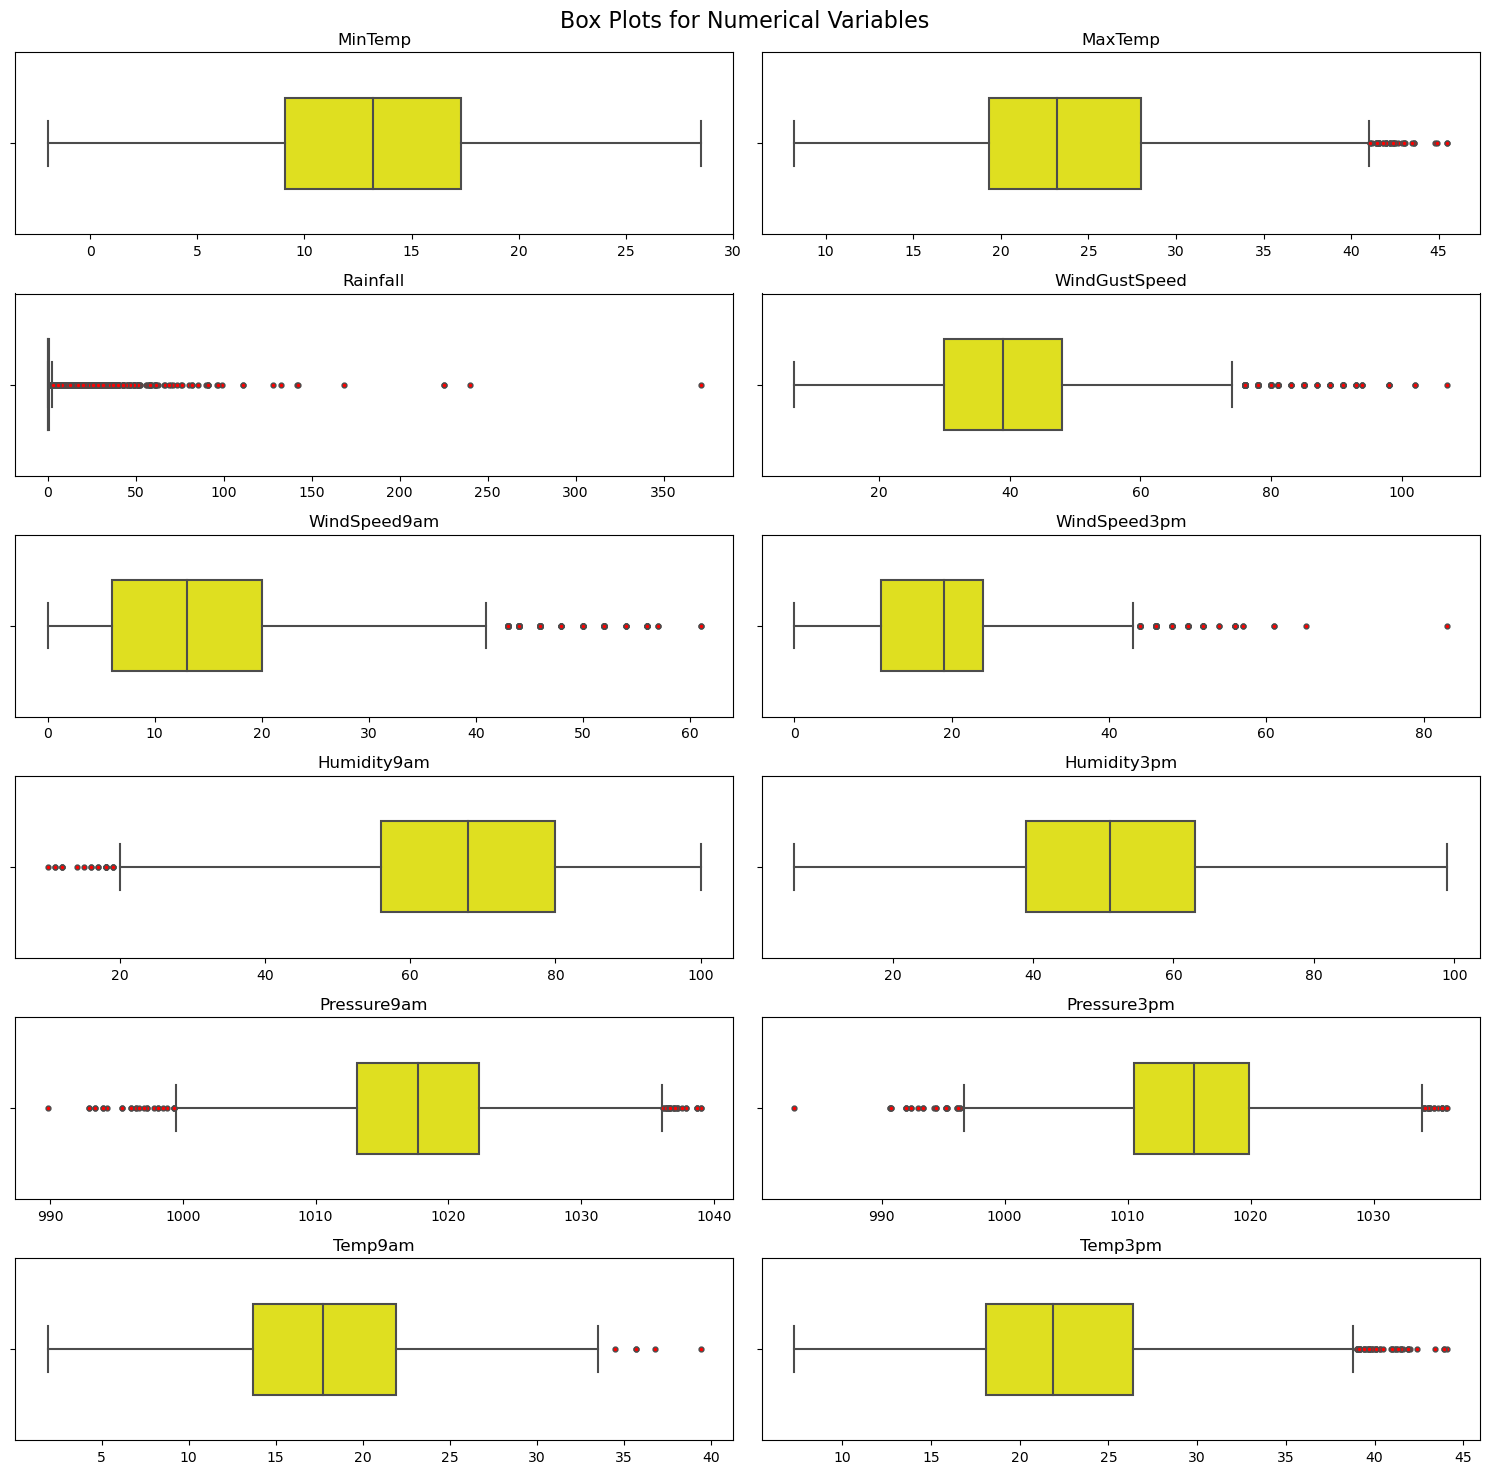

In [24]:
# Combined Box Plot for All Features
fig,axes = plt.subplots(6,2,figsize=(15,15))

# Creating a Function for Plots
def plot_two(feat,i,j):
    sns.boxplot(x=df[feat],color='yellow', width=0.5, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 3.5}, ax=axes[i,j])
    axes[i, j].set_title(feat)
    axes[i, j].set_xlabel('')

for i,feat in enumerate(numeric_columns):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)
    warnings.filterwarnings("ignore", category=UserWarning)

fig.suptitle('Box Plots for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li>The follwing feature exhibhit Gaussian Distribution 'MinTemp','MaxTemp','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'</li>
        <li>The follwing feature exhibhit Non-Gaussian Distribution 'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am'.</li>
        <li>It is quite Evident from the boxplot that the data set has outlier's.</li>
         <li>As per the Objective of the Study is to Apply Models with Tree based, Which has minimal effect of Feature Engineering - Feature Scaling, Feature Transformation. For this particular kernel More focus will be on trying out Decison Based Algorithm and Extensive Hyper-parameter Tuning .</li>
    </ul>
</div>

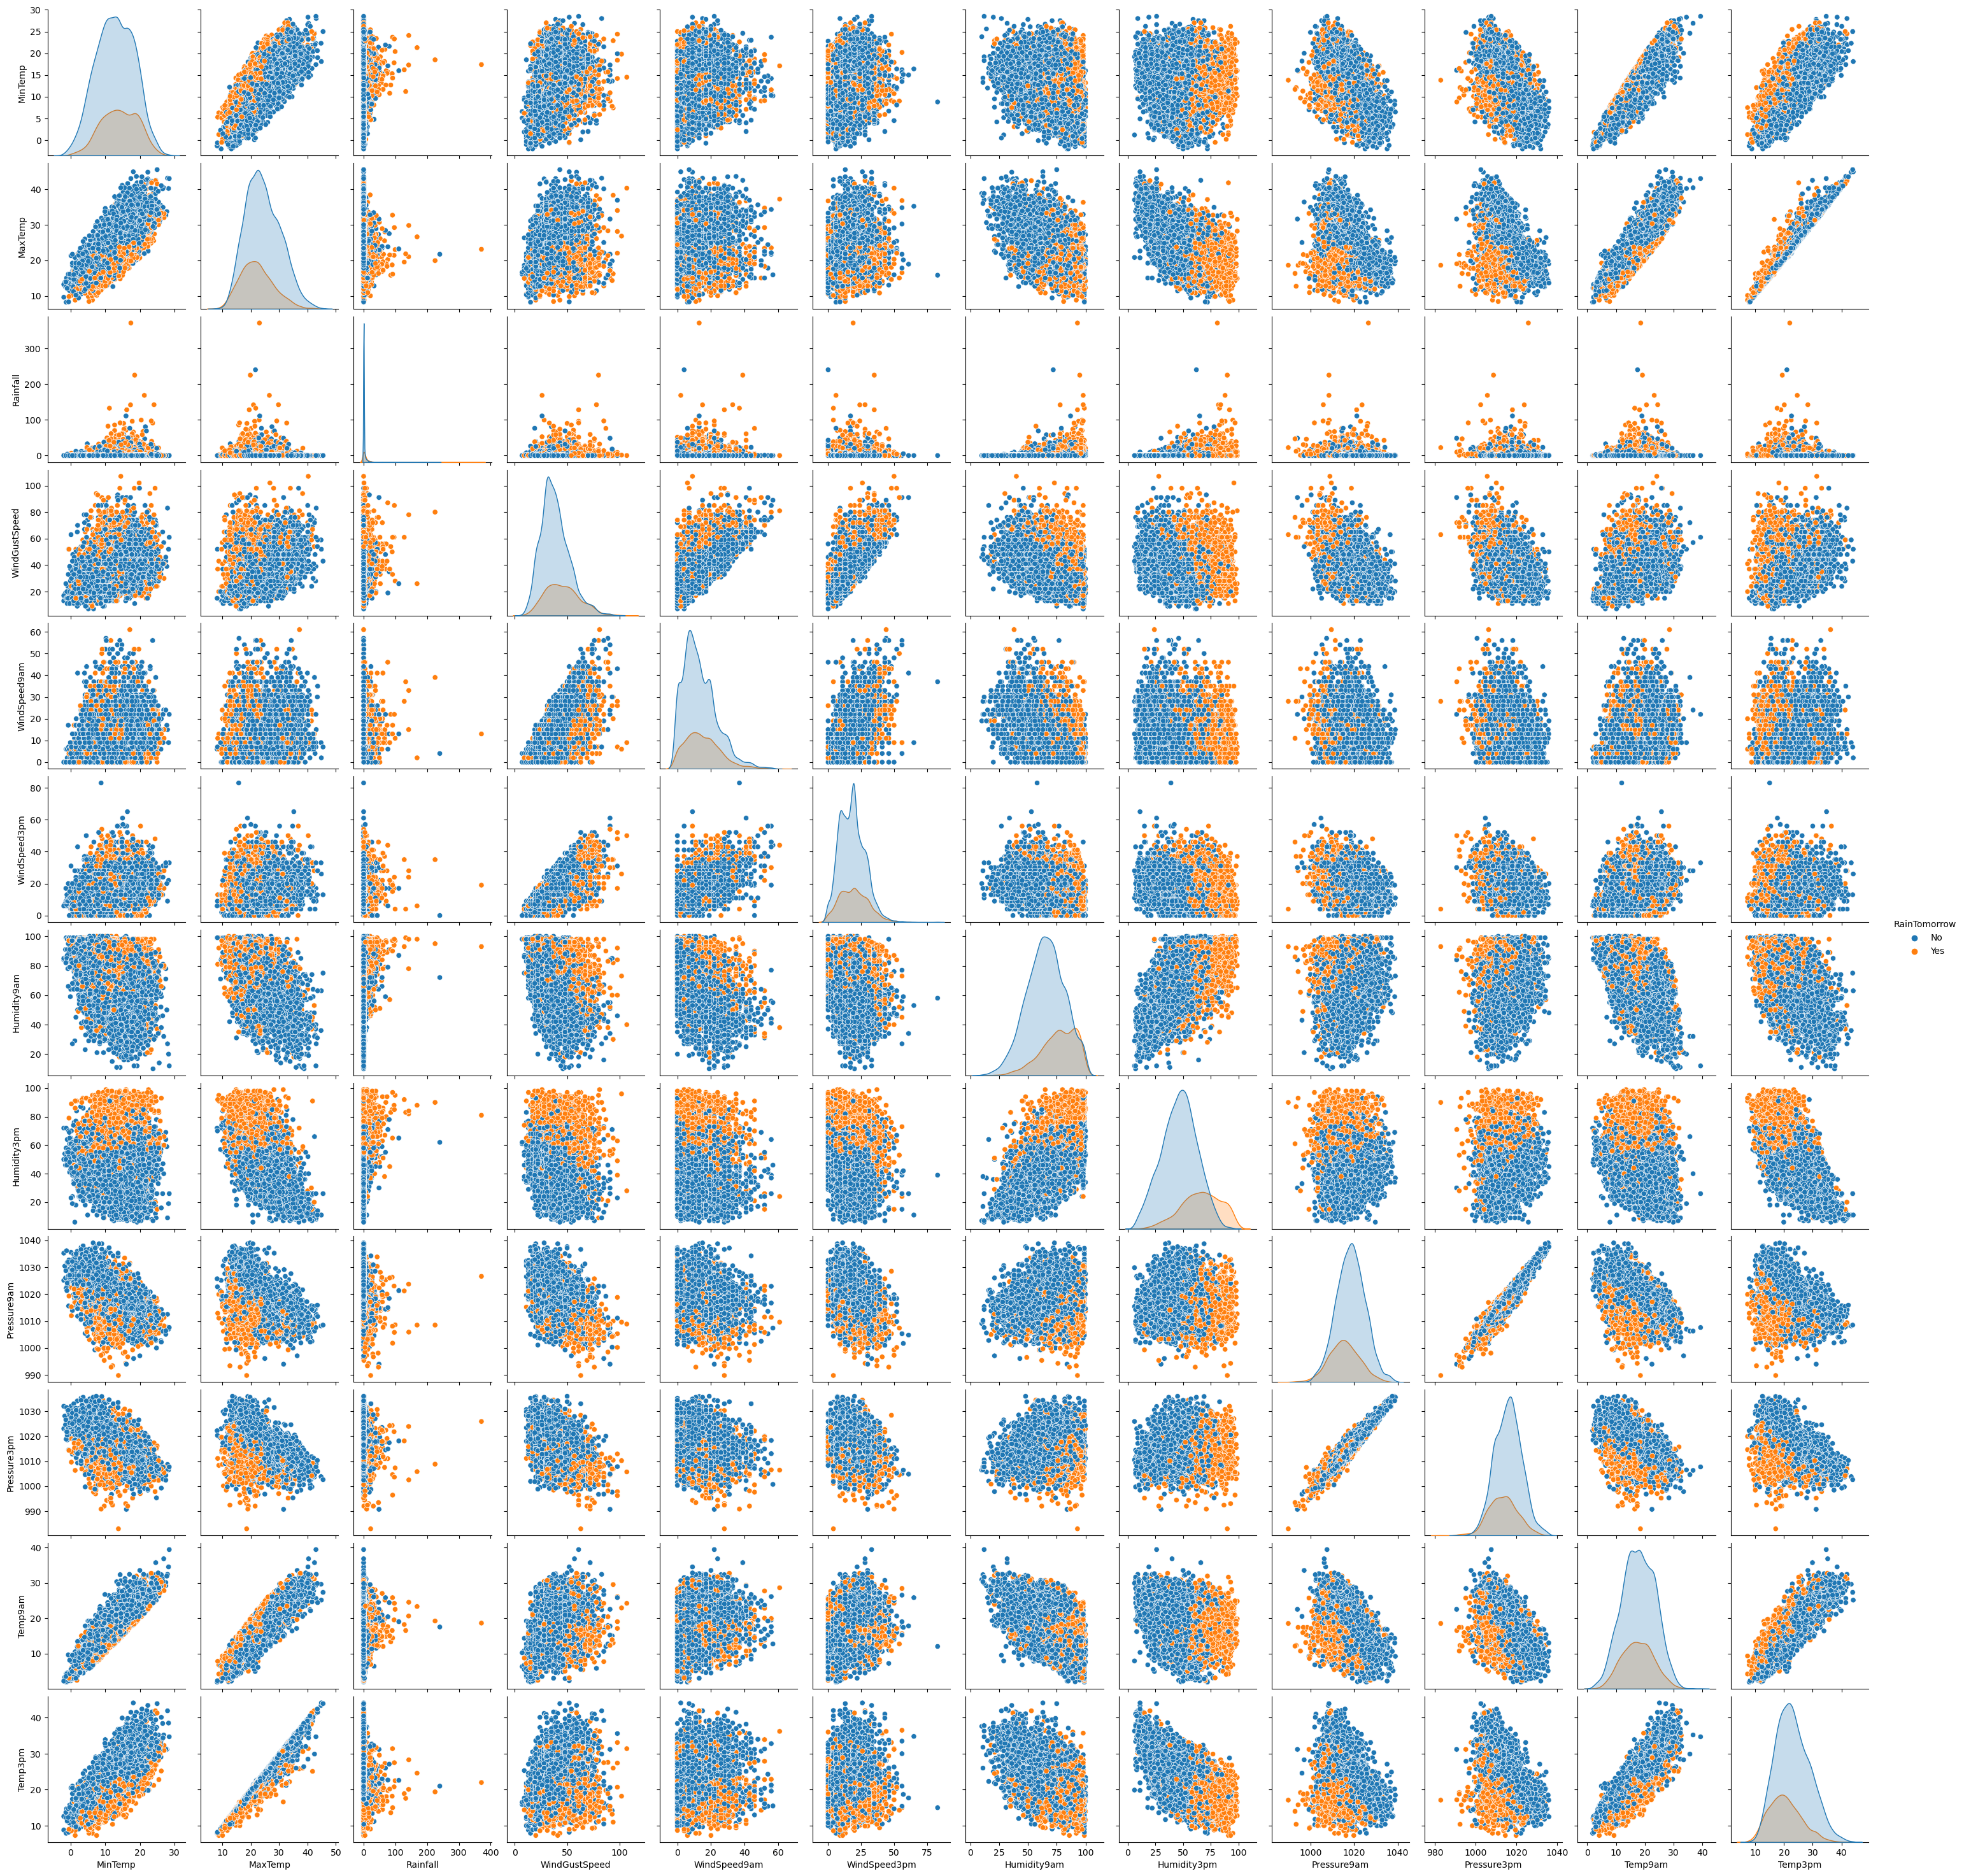

In [15]:
sns.pairplot( data=df, vars=numeric_columns, hue='RainTomorrow' )

<h2 align="left"><font color=#0E9D00><u>Train Test Split -</u> Executing Initially To Prevent Data Leakage</font></h2>

In [25]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:17],df.iloc[:,-1],test_size=0.3, random_state=52)

# Converting y_train, y_test back to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5730, 17), (5730, 1), (2456, 17), (2456, 1))

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li> By splitting the data first, to ensure that feature engineering is based solely on the training data, to avoid data leakage and making the model evaluation more reliable and realistic.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-4"></a> 
<p style="padding: 10px;
              color:white;">
              4. Feature Engineering 🛠️
</p>
</div>

<h2 align="left"><font color=#0E9D00><u>1. Handling Missing Values</u></font></h2>

In [26]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with the strategy set to 'median'
median_imputer = SimpleImputer(strategy='median')

# Loop through numeric columns and impute missing values with medians
for col in numeric_columns:
    X_train[[col]] = median_imputer.fit_transform(X_train[[col]])
    X_test[[col]] = median_imputer.fit_transform(X_test[[col]])

In [27]:
mode_imputer = SimpleImputer(strategy='most_frequent')

# Loop through categorical columns and impute missing values with the mode
for col in categorical_columns:
    X_train[[col]] = mode_imputer.fit_transform(X_train[[col]])
    X_test[[col]] = mode_imputer.transform(X_test[[col]])

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li> Median imputation - For numeric features and mode imputation for categorical features are robust strategies that help preserve the underlying distribution of the data. When you replace missing values with the median for numeric data, you're essentially filling in the gaps with a value that represents the central tendency of the feature, which helps maintain the overall shape of the distribution.</li>
<li> Mode Imputation - For categorical features, using the mode ensures that you impute missing values with the most frequent category, which is often a reasonable approximation for the missing data while keeping the distribution of the categorical variable intact.</li>
        <li>These methods are less sensitive to outliers compared to other imputation methods (e.g., mean imputation for numeric data), which is particularly important when dealing with datasets that might contain extreme values that could distort imputed values.</li>
    </ul>
</div>

<h2 align="left"><font color=#0E9D00><u>2. Outlier Treatment</u></font></h2>

In [28]:
Normal_Features = ['MinTemp','MaxTemp','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
Non_Normal_Features = ['WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am']

In [29]:
z_score_threshold = 3

def replace_outliers_with_median(dataframe):
    for column in Normal_Features:
        z_scores = np.abs((dataframe[column] - dataframe[column].mean()) / dataframe[column].std())
        outliers = z_scores > z_score_threshold
        median_value = dataframe[column].median()
        dataframe.loc[outliers, column] = median_value

# Detect and replace outliers with the median
replace_outliers_with_median(X_train)
replace_outliers_with_median(X_test)

In [30]:
def replace_outliers_with_median_iqr(dataframe):
    for column in Non_Normal_Features:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        median_value = dataframe[column].median()
        dataframe.loc[outliers, column] = median_value

# Detect and replace outliers with the median using the IQR method
replace_outliers_with_median_iqr(X_train)
replace_outliers_with_median_iqr(X_test)

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li> The purpose of selecting the z-score method for normally distributed data and the IQR method for non-normally distributed data as it aligns with the chosen outlier treatment method and the inherent properties of the data, leading to more accurate and robust results. It reflects a data-driven and statistically sound approach to handling outliers in different types of distributions.</li>
    </ul>
</div>

<h2 align="left"><font color=#0E9D00><u>3. Encoding</u></font></h2>

In [31]:
from sklearn.preprocessing import LabelEncoder
# Target Variable Encoding
le = LabelEncoder()
y_train['RainTomorrow'] = le.fit_transform(y_train['RainTomorrow'])
y_test['RainTomorrow'] = le.fit_transform(y_test['RainTomorrow'])

# Default Variable Encoding
X_train['RainToday'] = le.fit_transform(X_train['RainToday'])
X_test['RainToday'] = le.fit_transform(X_test['RainToday'])



In [32]:
import category_encoders as ce
# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['Location'])

# Fit and transform the encoder on your DataFrame
X_train = encoder.fit_transform(X_train, y_train['RainTomorrow'])
X_test = encoder.fit_transform(X_test, y_test['RainTomorrow'])

In [33]:
# One-Hot Encoding (k-1) Pandas Method
X_train = pd.concat([X_train, pd.get_dummies(X_train[['WindGustDir','WindDir9am','WindDir3pm']],prefix=['WGD','WD9','WD3'],drop_first=True, dtype=int)],axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[['WindGustDir','WindDir9am','WindDir3pm']],prefix=['WGD','WD9','WD3'],drop_first=True, dtype=int)], axis=1)

# Now Drop the Original Column - WindGustDir
X_train = X_train.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1)
X_test = X_test.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1)

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>📊Observation and Insights:</b>
    <ul>
        <li>All categorical data in the dataset can be classified as nominal data. </li>
        <li>RainToday, RainTomorrow - Features with binary variable - Encoded with Label Encoding</li>
<li> Location feature -  70 Unique Values, One-hot Encoding will increasly the dimension and then leading to over-fitting, and hence Target Encoding(Mean of Target Variable) best suitable method here. </li>
        <li>WindGustDir,WindDir9am,WindDir3pm - 16 Unique Values - One-hot Encoding (k-1) is adopted in this case.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-5"></a> 
<p style="padding: 10px;
              color:white;">
              5. Decision Tree
</p>
</div>

In [34]:
# Essential's 
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Defining a DataFrame to Store all the Significant Results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'F1 Score', 'ROC-AUC'])

<h2 align="left"><font color=#0E9D00><u>Creating a Function for Evaluation</u></font></h2>

In [35]:
def evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,algorithm_name):
    global results_df
    # Calculate and print accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy Train:", train_accuracy)
    print("Accuracy Test:", test_accuracy)
    
    # Generate and print the classification report
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    
    
    # Generate, plot, and display the confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    # Generate, plot, and display the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.legend(loc = 'lower right', prop={'size': 12})
    plt.show()
    
    # Calculate accuracy, precision, and F1 score
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Create a temporary DataFrame with the results
    temp_df = pd.DataFrame({'Algorithm': [algorithm_name], 'Accuracy': [accuracy], 
                            'Precision': [precision], 'F1 Score': [f1], 'ROC-AUC': [roc_auc]})
    
    # Append results to the DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

<h2 align="left"><font color=#0E9D00><u>Building Model</u></font></h2>

In [36]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 15, 20,25]
}

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
Best Accuracy Score: 0.8230366492146597
CPU times: total: 391 ms
Wall time: 3.36 s


In [37]:
# Train a Decision Tree Classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(criterion= 'gini',max_depth= 10, splitter= 'best')
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [38]:
# Predition of Rainfall and Stroing the Outputs
y_train_pred = best_dt_classifier.predict(X_train)
y_test_pred = best_dt_classifier.predict(X_test)

Accuracy Train: 0.9141361256544502
Accuracy Test: 0.8261400651465798
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      1872
           1       0.69      0.49      0.58       584

    accuracy                           0.83      2456
   macro avg       0.77      0.71      0.73      2456
weighted avg       0.81      0.83      0.82      2456



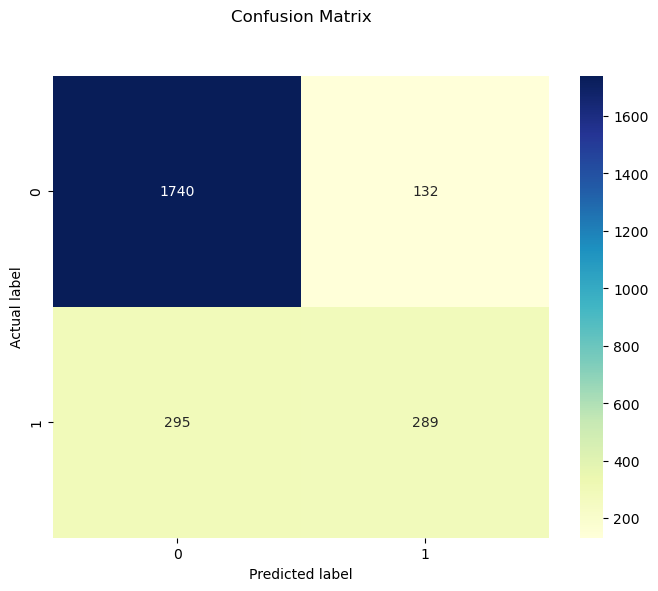

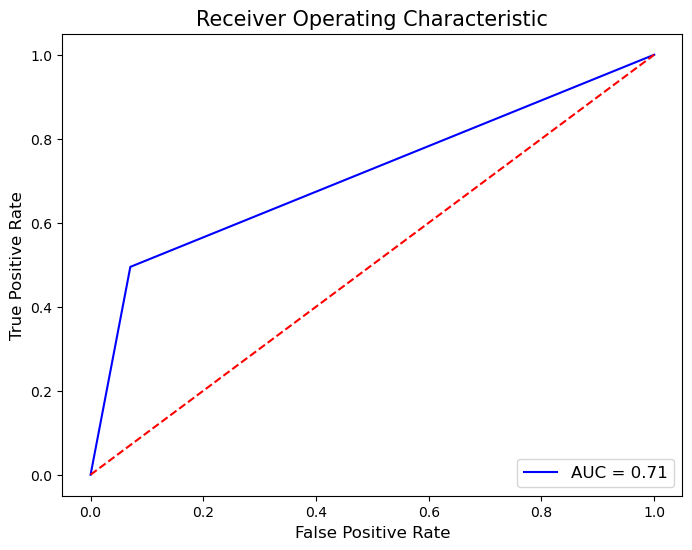

In [39]:
evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,'Decision Tree')

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>Decision Tree Results:</b>
    <ul>
        <b>Accuracy</b>
        <li>On the training data, the model has an accuracy of approximately 85.99%.</li>
        <li>On the testing data, the model has an accuracy of about 83.27%. The model is overfitting.</li>
        <b>AUC-ROC Score</b>
        <li>An AUC-ROC score of 0.70 suggests a moderate level of discrimination</li>
        <b>Classification Report</b>
        <li> Precison - 0.69 - This is crucial if false alarms for rain (predicting rain when it doesn't occur) are costly or have significant consequences. For example, in agriculture, unnecessary irrigation due to false rain predictions can waste resources.</li>
        <li> Recall - 0.45 - This is important in scenarios where missing a positive prediction (e.g., not predicting rain when it does rain) has significant consequences. In meteorology or disaster management, missing a rain prediction can be problematic.</li>
        <b>Confusion Matrix</b>
        <li>The confusion matrix shows that the model correctly predicted 31,198 instances of class 0 (no rain) and 4,325 instances of class 1 (rain). However, it also made 1,926 false positive predictions for class 1 and 5,209 false negatives for class 0.</li>
        <b>Wall Time</b>
        <li>The model took 55.2 seconds to train and test. Wall time can be an important consideration, especially in real-time or time-sensitive applications.</li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-6"></a> 
<p style="padding: 10px;
              color:white;">
              6. Random Forest
</p>
</div>

<h2 align="left"><font color=#0E9D00><u>Building Model</u></font></h2>

In [40]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [20,40,50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10,15, 20, 25, 30]
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 50}
Best Accuracy Score: 0.8713787085514835
CPU times: total: 812 ms
Wall time: 8.98 s


In [41]:
# Train a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(criterion= 'gini', max_depth= 25, n_estimators = 50)
best_rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=25, n_estimators=50)

In [42]:
# Predition of Rainfall and Stroing the Outputs
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)

<h2 align="left"><font color=#0E9D00><u>Model Evaluation</u></font></h2>

Accuracy Train: 0.9986038394415357
Accuracy Test: 0.884771986970684
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1872
           1       0.87      0.60      0.71       584

    accuracy                           0.88      2456
   macro avg       0.88      0.79      0.82      2456
weighted avg       0.88      0.88      0.88      2456



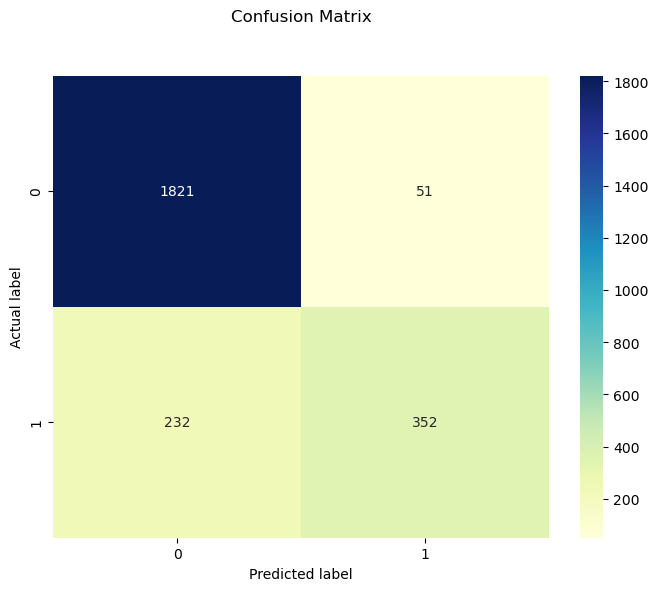

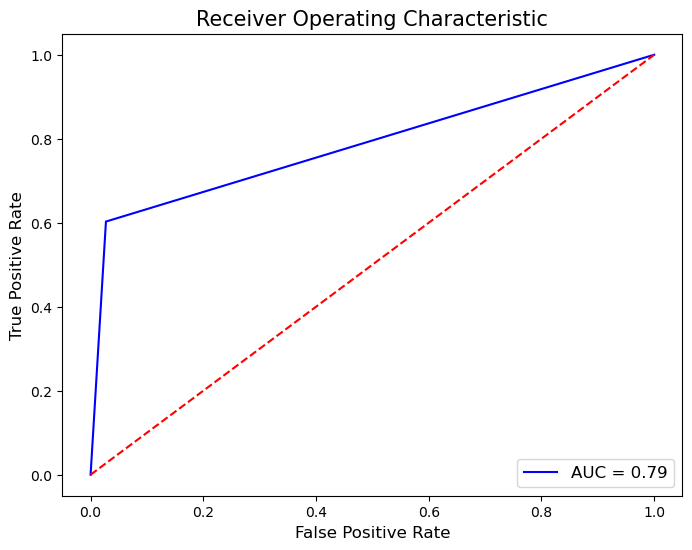

In [43]:
evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,'Random Forest')

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>Random Forest Results:</b>
    <ul>
        <b>Accuracy</b>
        <li>On the training data, the Random Forest model has a high accuracy of approximately 98.53%.</li>
        <li>On the testing data, the accuracy is also quite good, at about 84.77%. The model is overfitting.</li>
        <b>AUC-ROC Score</b>
        <li>The AUC-ROC score is 0.72. It suggests that the Random Forest model has a moderate ability to discriminate between positive and negative classes.</li>
        <b>Classification Report</b>
    <li>Precision for class 0 (no rain) is 0.86, indicating that when the model predicts no rain, it's correct about 86% of the time.</li>
    <li>Precision for class 1 (rain) is 0.75, suggesting that when the model predicts rain, it's correct about 75% of the time.</li>
    <li>Recall for class 0 is 0.95, which means that the model correctly captures 95% of the actual instances of no rain.</li>
    <li>Recall for class 1 is 0.48, indicating that the model captures only 48% of actual instances of rain.</li>
        <b>Confusion Matrix</b>
        <li>The confusion matrix shows that the model correctly predicted 31,579 instances of class 0 and 4,583 instances of class 1. It also made 1,545 false positive predictions for class 1 and 4,951 false negatives for class 0.
</li>
        <b>Wall Time</b>
        <li>The model took 8 minutes and 3 seconds to train and test. Random Forest models can be more computationally intensive, but they often provide good predictive performance.</li>
        <li>The Random Forest model shows a strong performance in terms of accuracy, precision for class 0 (no rain), and F1-score for class 0. However, the recall for class 1 (rain) is relatively low, indicating that the model struggles to correctly capture instances of rain. </li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-7"></a> 
<p style="padding: 10px;
              color:white;">
              7. Ada Boost
</p>
</div>

<h2 align="left"><font color=#0E9D00><u>Building Model</u></font></h2>

In [44]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [20,40,50],
    'learning_rate': [0.01,0.1, 0.5, 1.0,5]
}

# Create the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Hyperparameters: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.5, 'n_estimators': 50}
Best Accuracy Score: 0.8280977312390924
CPU times: total: 1.12 s
Wall time: 8.74 s


In [45]:
best_ada_classifier = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=2), learning_rate= 1.0, n_estimators= 50)
best_ada_classifier.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2))

In [46]:
y_train_pred = best_ada_classifier.predict(X_train)
y_test_pred = best_ada_classifier.predict(X_test)

<h2 align="left"><font color=#0E9D00><u>Model Evaluation</u></font></h2>

Accuracy Train: 0.862652705061082
Accuracy Test: 0.8293973941368078
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1872
           1       0.68      0.54      0.60       584

    accuracy                           0.83      2456
   macro avg       0.77      0.73      0.75      2456
weighted avg       0.82      0.83      0.82      2456



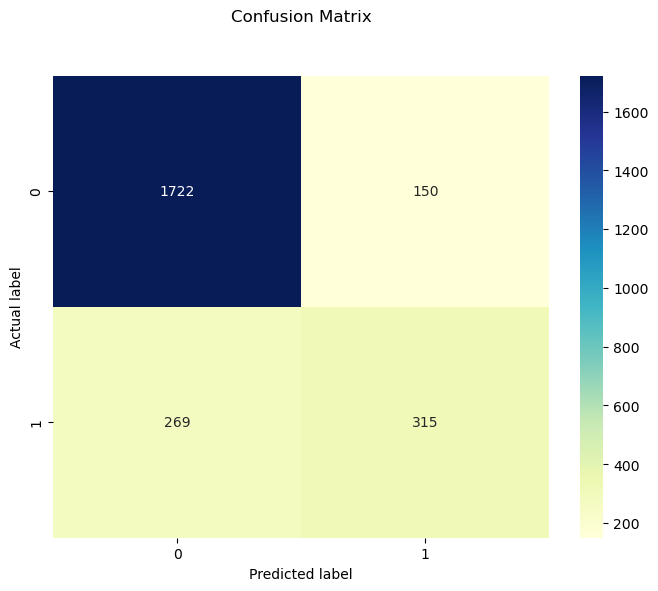

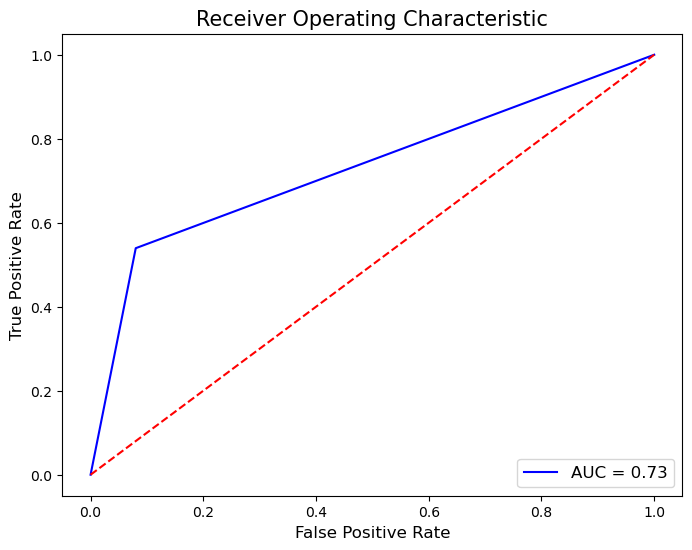

In [47]:
evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,'Ada Boost')

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
    <b>Ada Boost Results:</b>
    <ul>
        <b>Accuracy</b>
        <li>On the training data, the Random Forest model has a high accuracy of approximately 98.53%.</li>
        <li>On the testing data, the accuracy is also quite good, at about 84.77%. The model is overfitting.</li>
        <b>AUC-ROC Score</b>
        <li>The AUC-ROC score is 0.72. It suggests that the Random Forest model has a moderate ability to discriminate between positive and negative classes.</li>
        <b>Classification Report</b>
    <li>Precision for class 0 (no rain) is 0.86, indicating that when the model predicts no rain, it's correct about 86% of the time.</li>
    <li>Precision for class 1 (rain) is 0.75, suggesting that when the model predicts rain, it's correct about 75% of the time.</li>
    <li>Recall for class 0 is 0.95, which means that the model correctly captures 95% of the actual instances of no rain.</li>
    <li>Recall for class 1 is 0.48, indicating that the model captures only 48% of actual instances of rain.</li>
        <b>Confusion Matrix</b>
        <li>The confusion matrix shows that the model correctly predicted 31,579 instances of class 0 and 4,583 instances of class 1. It also made 1,545 false positive predictions for class 1 and 4,951 false negatives for class 0.
</li>
        <b>Wall Time</b>
        <li>The model took 8 minutes and 3 seconds to train and test. Random Forest models can be more computationally intensive, but they often provide good predictive performance.</li>
        <li>The Random Forest model shows a strong performance in terms of accuracy, precision for class 0 (no rain), and F1-score for class 0. However, the recall for class 1 (rain) is relatively low, indicating that the model struggles to correctly capture instances of rain. </li>
    </ul>
</div>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-8"></a> 
<p style="padding: 10px;
              color:white;">
              8. Gradient Boost
</p>
</div>

<h2 align="left"><font color=#0E9D00><u>Building Model</u></font></h2>

In [48]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [25,40,50],
    'learning_rate': [0.01, 0.1, 0.5, 1.0,5],
    'max_depth': [3, 5]
}

# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 40}
Best Accuracy Score: 0.8485165794066317
CPU times: total: 1.25 s
Wall time: 12.1 s


In [49]:
best_gb_classifier = GradientBoostingClassifier(learning_rate= 0.5, max_depth= 5, n_estimators= 50)
best_gb_classifier.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=50)

In [50]:
y_train_pred = best_gb_classifier.predict(X_train)
y_test_pred = best_gb_classifier.predict(X_test)

<h2 align="left"><font color=#0E9D00><u>Model Evaluation</u></font></h2>

Accuracy Train: 0.9778359511343805
Accuracy Test: 0.8574918566775245
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1872
           1       0.74      0.62      0.67       584

    accuracy                           0.86      2456
   macro avg       0.81      0.78      0.79      2456
weighted avg       0.85      0.86      0.85      2456



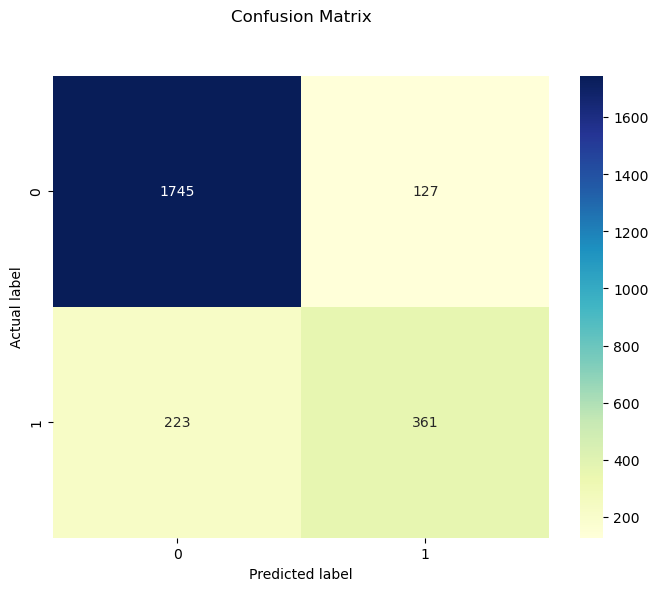

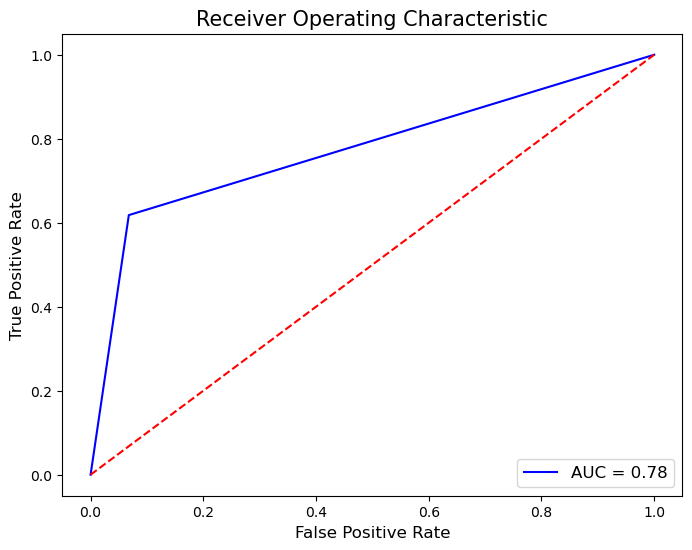

In [51]:
evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,'Gradient Boost')

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
<b>Gradient Boost Model Results:</b>

<b>Accuracy:</b>
- On the training data, the Gradient Boost model achieved an accuracy of approximately 87.10%.
- On the testing data, the accuracy was approximately 84.60%.

<b>AUC-ROC Score:</b>
- The AUC-ROC score is 0.73, indicating a moderate to good ability of the Gradient Boost model to discriminate between positive and negative classes.

<b>Classification Report:</b>
- Precision for class 0 (no rain) is 0.87, suggesting that when the model predicts no rain, it's correct about 87% of the time.
- Precision for class 1 (rain) is 0.72, indicating that when the model predicts rain, it's correct about 72% of the time.
- Recall for class 0 is 0.94, meaning that the model correctly captures 94% of the actual instances of no rain.
- Recall for class 1 is 0.51, implying that the model captures 51% of actual instances of rain.

<b>Confusion Matrix:</b>
- The confusion matrix shows that the model correctly predicted 31,201 instances of class 0 and 4,887 instances of class 1. However, it also made 1,923 false positive predictions for class 1 and 4,647 false negatives for class 0.

<b>Wall Time:</b>
- The model took 14 minutes and 41 seconds to train and test.



<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-9"></a> 
<p style="padding: 10px;
              color:white;">
              9. XGBoost
</p>
</div>

<h2 align="left"><font color=#0E9D00><u>Building Model</u></font></h2>

In [56]:
%%time
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [25,40,50],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5]
}

# Create the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Best Accuracy Score: 0.8616055846422338
CPU times: total: 1.12 s
Wall time: 7.84 s


In [57]:
best_xgb_classifier = xgb.XGBClassifier(learning_rate = 0.5, max_depth= 5, n_estimators= 50)
best_xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_train_pred = best_xgb_classifier.predict(X_train)
y_test_pred = best_xgb_classifier.predict(X_test)

<h2 align="left"><font color=#0E9D00><u>Model Evaluation</u></font></h2>

Accuracy Train: 0.96282722513089
Accuracy Test: 0.8574918566775245
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1872
           1       0.74      0.61      0.67       584

    accuracy                           0.86      2456
   macro avg       0.81      0.77      0.79      2456
weighted avg       0.85      0.86      0.85      2456



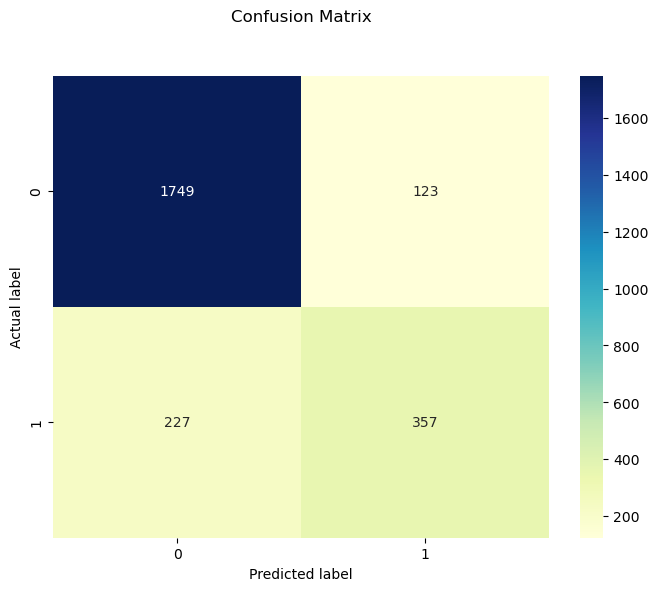

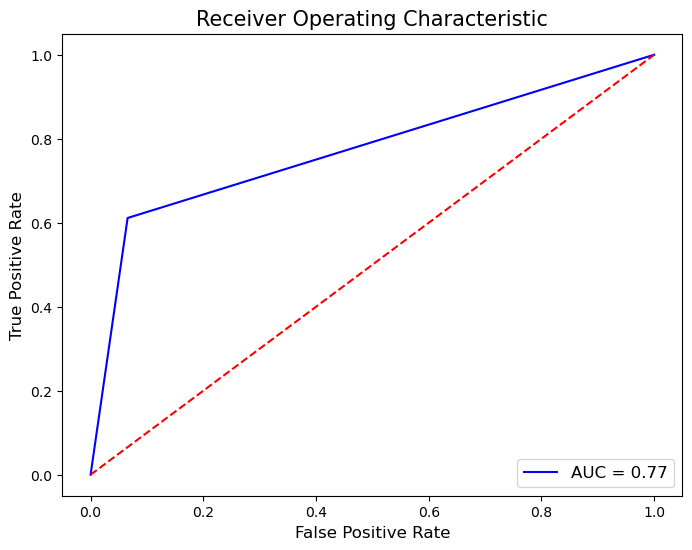

In [59]:
evaluate_classification(y_train, y_train_pred, y_test, y_test_pred,'XGBoost')

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 14px;">  
<b>XG Boost Model Results:</b>

<b>Accuracy:</b>
- On the training data, the XG Boost model achieved an accuracy of approximately 86.66%.
- On the testing data, the accuracy was approximately 85.02%.

<b>AUC-ROC Score:</b>
- The AUC-ROC score is 0.73, indicating a moderate to good ability of the XG Boost model to discriminate between positive and negative classes.

<b>Classification Report:</b>
- Precision for class 0 (no rain) is 0.87, suggesting that when the model predicts no rain, it's correct about 87% of the time.
- Precision for class 1 (rain) is 0.74, indicating that when the model predicts rain, it's correct about 74% of the time.
- Recall for class 0 is 0.95, meaning that the model correctly captures 95% of the actual instances of no rain.
- Recall for class 1 is 0.51, implying that the model captures 51% of actual instances of rain.
- The F1-score for class 0 is 0.91, while for class 1, it is 0.61.

<b>Confusion Matrix:</b>
- The confusion matrix shows that the model correctly predicted 31,358 instances of class 0 and 4,909 instances of class 1. However, it also made 1,766 false positive predictions for class 1 and 4,625 false negatives for class 0.

<b>Wall Time:</b>
- The model took 6 minutes and 37 seconds to train and test.

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#00F180;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:1px">
<a class="anchor" id="CH-10"></a> 
<p style="padding: 10px;
              color:white;">
              10. Result and Discussion 📈✔️
</p>
</div>

In [61]:
# Define a function to highlight maximum values
def highlight_max_except_first_col(col):
    if col.name == results_df.columns[0]:
        return [''] * len(col)
    is_max = col == col.max()
    return ['background-color: #00F180' if v else '' for v in is_max]

# Apply the function to the entire DataFrame
styled_df = results_df.style.apply(highlight_max_except_first_col)

# Display the styled DataFrame
styled_df

<div class="alert alert-block alert-success" style="margin-bottom: 20px; font-size: 16px;">  
    <b>Result and Discussion</b>
    <ul>
<li>If prioritize accuracy, Random Forest and XG Boost are the top performers.</li>
<li>If prioritize AUC-ROC score, Gradient Boost and XG Boost are strong choices.</li>
<li>For precision and recall in class 0, Random Forest and XG Boost stand out.</li>
<li>For precision in class 1, XG Boost performs well.</li>
<li>For recall in class 1, XG Boost and Gradient Boost are competitive.</li>
<li>If there is need to balance computational efficiency and performance, Decision Tree is the fastest, but Random Forest and XG Boost are also viable options. </li>
        <li> In this context, XG Boost emerges as the leading choice, excelling in performance. </li>
</div>